<a href="https://colab.research.google.com/github/dangulosum/Data_science_1/blob/main/ProyectoDS_Diego_Angulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO: MODELO DE PREDICCION DE SALARIOS POR TIPO DE CARRERA CURSADA
###POR: ING. DIEGO ANGULO SUMARRIVA



---



##1. CRITERIOS BASE DEL PROYECTO

###1.1. RESUMEN DE ORIGEN DE DATOS
Para el presente proyecto se ha trabajado con un dataset de explora la relación entre el rendimiento educativo y el éxito laboral; compuesta por 5000 registros y 20 dimensiones, obtenida de Kaggle y alojada en un repositorio público en github.


###1.2. OBJETIVO GENERAL
Definir un modelo para predecir la banda salarial por tipo de profesión.


###1.4. ALCANCE
El presente proyecto está enfocado en el análisis de los resultados de rendimiento educativo y éxito laboral de 5000 registros empleando las librerías de Python con la finalidad de determinar el porcentaje de éxito profesional por cada carrera profesional registrada.


###1.5. HIPOESIS
Con base en los registros del dataset, se tienen las siguientes hipótesis H0 y Ha:


*   H0: La mejor remuneración salarial se logra con tener una relación equitativa con un buen desempeño académico y realizando actividades extracurriculares.
*   Ha: La mejor remuneración salarial no se logra con tener una relación equitativa con un buen desempeño académico y realizando actividades extracurriculares.





---



##2. ANALISIS BASE DE DATASET

##2.1. CREACION DE DATA FRAME
Para la creación del data frame, se ha alojado inicialmente el dataset en el repositorio de github y se ha vinculado empleando la extensión RAW con la librería Pandas.

In [ ]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np

#GENERAR DATA FRAME
url_ds = 'https://raw.githubusercontent.com/dangulosum/Data_science_1/refs/heads/main/education_career_success.csv'
df = pd.read_csv(url_ds)
df.head(5000)

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S04996,26,Female,2.44,1258,776,2.44,Arts,3,7,3,8,5,5,31500.0,9,5,Mid,7,No
4996,S04997,18,Female,3.94,1032,923,3.73,Law,0,9,3,6,4,5,41800.0,9,2,Entry,4,No
4997,S04998,19,Female,3.45,1299,720,2.52,Law,3,5,5,6,2,2,49500.0,2,5,Mid,6,No
4998,S04999,19,Male,2.70,1038,319,3.94,Law,1,4,5,5,1,5,54700.0,9,4,Entry,6,No


##2.2. ANALISIS DE VALORES NULL Y TIPO DE DATOS

Para poder realizar el análisis de los valores nulos e identificar los tipos de datos con los que se trabajarán, se utilizó el método info().

In [ ]:
#ANALISIS GENERAL - NULL Y TIPO DE DATO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

Como se puede observar, tras emplear el método info(), se observa que de todos los 5000 registros en cada una de las dimensiones, no se tienen valores faltantes (NaN) y olos tipos de datos con los que se va a trabajar son de tipo entero (int), flotante (float) y objeto (object). Con ello, se concluye inicialmente que no es necesario realizar un tratamiento de la data referente a datos nulos.

##2.3. ANALISIS DE ESTADISTICOS GENERALES

La información del dataset está agrupada en 5 bloques (datos base del estudiante, rendimiento académico, habilidades y actividades extracurriculares y resultados profesionales. Como parte del análisis para la evaluación de las hipótesis planteadas, se ha empleado el método describe() para obtener los estadísticos base que se emplearán en los puntos posteriores (cantidad, media, desviación estandar, valor mínimo y máximo, y los percentiles).

In [ ]:
#ANALISIS GENERAL - INDICADORES BASE
df.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Work_Life_Balance
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000,5.578000,3.015800,5.482400
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207,2.871997,1.417446,2.883427
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000,1.000000,1.000000,1.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000,3.000000,2.000000,3.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000,6.000000,3.000000,6.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000,8.000000,4.000000,8.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000,10.000000,5.000000,10.000000


##2.4. ANALISIS CON GRAFICOS

In [ ]:
#IMPORTAR LIBRERIAS
import matplotlib.pyplot as plt
import seaborn as sns

Para el análisis, se tiene la siguiente distribución de los datos:

1. Información de estudiante:
* Student_ID – Identificador único para cada estudiante
* Edad – Edad del estudiante (18-30 años)
* Género : masculino, femenino u otro

2. Rendimiento académico:
* GPA de la escuela secundaria : GPA de la escuela secundaria (escala de 2.0 a 4.0)
* SAT_Score – Puntaje de prueba estandarizada (900 - 1600)
* University_Ranking – Ranking de la universidad a la que asistió (1-1000)
* GPA universitario : GPA universitario (escala 2.0 - 4.0)
* Campo de estudio : especialidad o disciplina (por ejemplo, informática, medicina, negocios)

3. Habilidades y actividades extracurriculares:
* Prácticas realizadas – Número de prácticas realizadas (0-4)
* Proyectos_Completados – Número de proyectos personales/académicos completados (0-9)
* Certificaciones – Número de certificaciones adicionales obtenidas (0-5)
* Soft_Skills_Score – Calificación de habilidades blandas (1-10)
* Networking_Score : puntuación basada en conexiones y redes profesionales (1-10)

4. Resultados profesionales
* Ofertas de trabajo – Número de ofertas de trabajo recibidas después de la graduación (0-5)
* Salario inicial : salario del primer empleo en USD (25 000 USD - 150 000 USD)
* Satisfacción profesional : nivel de satisfacción profesional (1-10)
* Years_to_Promotion – Tiempo que lleva recibir la primera promoción (1-5 años)
* Nivel_de_trabajo_actual : nivel de carrera (principiante, intermedio, sénior, ejecutivo)
* Work_Life_Balance : calificación del equilibrio entre el trabajo y la vida personal (1-10)
* Emprendimiento : si el individuo inició un negocio (Sí/No)

Con ello, se ha procedido a realizar el análisis de los valores por cada grupo inicialmente.

['Male' 'Other' 'Female']
Gender
Male      2458
Female    2350
Other      192
Name: count, dtype: int64


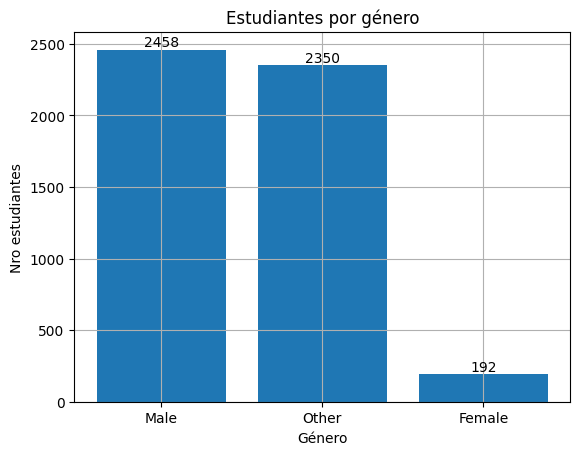

In [ ]:
#DISTRIBUCION DE ESTUDIANTES POR GENERO
count_gender = df['Gender'].value_counts()
x_gender = df['Gender'].unique()
print(x_gender)
print(count_gender)

plt.bar(x_gender , count_gender)
plt.title('Estudiantes por género')
plt.xlabel('Género')
plt.ylabel('Nro estudiantes')

for i, x in enumerate(count_gender):
    plt.text(i, x, str(x), ha='center', va='bottom')

plt.grid(True)
plt.show()

Con el primer comparativo para determinar la distribución de los estudiantes por género registrado, se concluye que el 49.16% de los estudiantes son varones y que el 47% no indicasu género.

<ipython-input-70-c8b8c2197f29>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_gener_r_age = df.groupby(['Age_range' , 'Gender']).size().unstack()


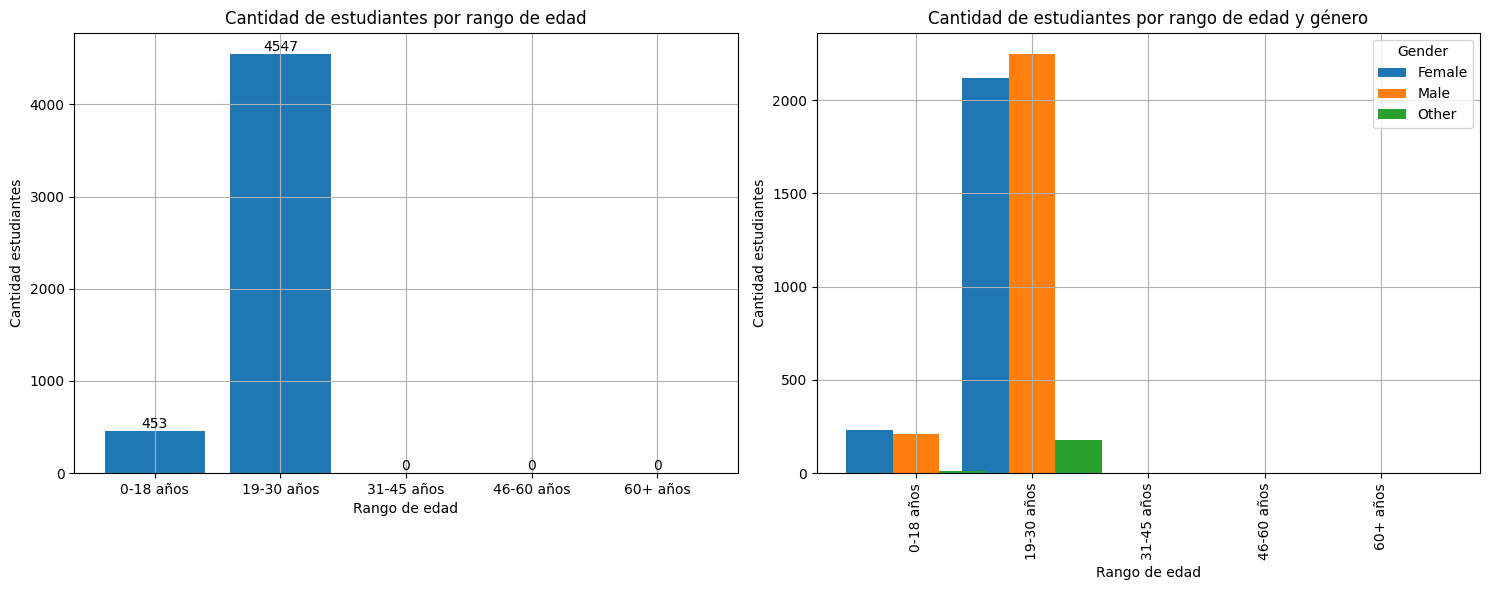

In [70]:
# DISTRIBUCION DE ESTUDIANTES POR GENERO Y EDAD

age_range = pd.cut(df['Age'] , bins=[0 , 18, 30, 45, 60, 100] , labels=['0-18 años', '19-30 años', '31-45 años', '46-60 años', '60+ años']) #CREACION DE DIMENSION LOS RANGOS DE EDAD EN DATAFRAME
df['Age_range'] = age_range #AGREGAR DIMENSION AL DATAFRAME

count_r_age = df['Age_range'].value_counts().sort_index() #CONTAR LA CANTIDAD DE ESTUDIANTES POR RANGO DE EDAD ASIGNADO CON NUEVA DIMENSION EN DATAFRAME
count_gener_r_age = df.groupby(['Age_range' , 'Gender']).size().unstack()

##PARAMETROS PARA GRILLA DE GRAFICOS
fig , axes = plt.subplots(1 , 2 , figsize=(15 , 6)) #PROMP PARA QUE LOS GRAFICOS APARESCAN EN UNA GRILLA DE 1 FILA Y 2 COLUMNAS

##GRAFICO DE EDADES POR RANGOS
axes[0].bar(count_r_age.index , count_r_age.values)

for i, x in enumerate(count_r_age.values):
    axes[0].text(i, x, str(x), ha='center', va='bottom')

axes[0].set_title('Cantidad de estudiantes por rango de edad')
axes[0].set_xlabel('Rango de edad')
axes[0].set_ylabel('Cantidad estudiantes')
axes[0].grid(True)

##GRAFICO DE EDADES POR RANGOS Y GENEROS
count_gener_r_age.plot(kind='bar' , stacked=False , ax=axes[1] , width=1.2)

axes[1].set_title('Cantidad de estudiantes por rango de edad y género')
axes[1].set_xlabel('Rango de edad')
axes[1].set_ylabel('Cantidad estudiantes')
axes[1].grid(True)

plt.tight_layout()
plt.show()

Luego, tras realizar la distribución de estudiantes por rango etario, se concluye que el 90.94% se encuentran entre los 19 a 30 años.